<h1> Introduction </h1>

<p>Seattle and San Francisco are two of the most well known cities in America. San Francisco is located in California, the most populous state, and is a major center of business and entertainment. San Francisco is one of the richer cities in California and that was one of the reasons it was chosen along with Seattle. Seattle is the most famous and largest city in Washington and alongside its thriving businesses and opportunities found in Seattle it is also known as a rainy city.The neighborhoods of these two affluent cities will be provided by wikipedia and they will be compared[1,2]. So what will the data be used for?
    
The problem to be solved is say a person was moving from one city to the other ,it doesn't matter which to which, which neighborhood do they settle in? Are there any definitely distinct neighborhoods in either city? Furthermore, if a person wants to start a business in either city and live there? Is there a less expesive city to live in and are there neighborhoods that don't have certain businesses that a person can start in that neighborhood so as to have less competition.</p>

<h2> Data </h2>

<p>
The data that will be used have the following descriptions:

<ul>
    <li> The wikipedia pages of the lists of neighborhoods will either be scraped if it is required or the pd.read_html function will be used if the neighborhoods are already in a table format. The pages will provide us with the necessary neighborhoods we need. However, it should be noted that seattle is MUCH larger than San Francisco so will have more neighborhoods.The neighborhood names might also need to be cleaned of special characters in case it gets in the way.</li>  
<li> THe latitudes and longitudes of the Neighborhoods will be provided by the geopy.geocoders Nominatim which will undoubtedly have some problems that in finding the correct location so double checking on the locations will be a priority.</li>
<li>The foursquare API will be used to get the Venues of each of the neighborhoods if it has any venues [3].</li>
<li> The median housing prices of each city will be provided by REDFIN a website that has real estate data for many locations</li>
</ul>


</p>

<h1> Methodology </h1>

In [828]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
import numpy as np
#!pip install folium
import folium

In [829]:
#get sanfran Neighborhoods, and also get seattle Neighborhoods


seat_url="https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle"


results_sf_html=requests.get("https://en.wikipedia.org/wiki/List_of_neighborhoods_in_San_Francisco")

results_seat=pd.read_html(seat_url)




In [830]:
results_seat=results_seat[0].iloc[:,0:2]
results_seat

,Unnamed: 0,Neighborhood name
0,1,North Seattle
1,2,Broadview
2,3,Bitter Lake
3,4,North Beach / Blue Ridge
4,5,Crown Hill
...,...,...
122,123,Riverview
123,124,Highland Park
124,125,South Delridge
125,126,Roxhill


In [831]:
results_seat=results_seat.drop(["Unnamed: 0"],axis=1)


In [832]:
results_seat

,Neighborhood name
0,North Seattle
1,Broadview
2,Bitter Lake
3,North Beach / Blue Ridge
4,Crown Hill
...,...
122,Riverview
123,Highland Park
124,South Delridge
125,Roxhill


In [833]:
html=results_sf_html.content
bs_sf = bs(html, 'html.parser')
type(bs_sf)

bs4.BeautifulSoup

In [834]:
sf_li=bs_sf.find("ul")

sf_list=sf_li.find_all('li')

In [835]:
sf_full_list=[]
for items in sf_list:
    print(items.a.span.next_sibling.next_sibling.text)
    sf_full_list.append(items.a.span.next_sibling.next_sibling.text)



Alamo Square
Anza Vista
Ashbury Heights
Balboa Hollow
Balboa Terrace
Bayview
Belden Place
Bernal Heights
Buena Vista
Butchertown (Old and New)
Castro
Cathedral Hill
Cayuga Terrace
China Basin
Chinatown
Civic Center
Clarendon Heights
Cole Valley
Corona Heights
Cow Hollow
Crocker-Amazon
Design District
Diamond Heights
Dogpatch
Dolores Heights
Duboce Triangle
Embarcadero
Eureka Valley
Excelsior
Fillmore
Financial District
Financial District South
Fisherman's Wharf
Forest Hill
Forest Knolls
Glen Park
Golden Gate Heights
Haight-Ashbury
Hayes Valley
Hunters Point
India Basin
Ingleside
Ingleside Terraces
Inner Sunset
Irish Hill
Islais Creek
Jackson Square
Japantown
Jordan Park
Laguna Honda
Lake Street
Lakeside
Lakeshore
Laurel Heights
Lincoln Manor
Little Hollywood
Little Russia
Little Saigon
Lone Mountain
Lower Haight
Lower Pacific Heights
Lower Nob Hill
Marina District
Merced Heights
Merced Manor
Midtown Terrace
Mid-Market
Miraloma Park
Mission Bay
Mission District
Mission Dolores
Mission T

In [836]:
results_sf=pd.DataFrame(columns=["Neighborhoods"],data=sf_full_list)
results_sf=results_sf[:119]

In [837]:
results_sf

,Neighborhoods
0,Alamo Square
1,Anza Vista
2,Ashbury Heights
3,Balboa Hollow
4,Balboa Terrace
...,...
114,West Portal
115,Western Addition
116,Westwood Highlands
117,Westwood Park


In [583]:
#!pip install geopy

<p> Changing Butchertown(Old and new) to just Butchertown so it can be used by geopy.geocoders </p>

In [841]:
results_sf=results_sf.replace(['Butchertown (Old and New)'],'Butchertown')

<p> Getting the latitude and longitude of each neighborhood, there is a try and except statement because some locations are not recognized by geopy.geocoders Nominatim which just appends 0 to the latitude and longitude to delete later </p> 

In [842]:
from geopy.geocoders import Nominatim


In [843]:
geolocator = Nominatim(user_agent="my_app")

def get_latlan(addresses,city,state):
    lat=[]
    lng=[]
    for addres in addresses:
        try:
            print(addres)
            location=location=geolocator.geocode("{} , {} {}".format(addres,city,state))
            lat.append(location.latitude)
            lng.append(location.longitude)
        except:
            lat.append(0)
            lng.append(0)
            continue
    return lat,lng


In [844]:
results_sf["Latitude"],results_sf["Longitude"]=get_latlan(results_sf["Neighborhoods"],"San Francisco","California")


Alamo Square
Anza Vista
Ashbury Heights
Balboa Hollow
Balboa Terrace
Bayview
Belden Place
Bernal Heights
Buena Vista
Butchertown
Castro
Cathedral Hill
Cayuga Terrace
China Basin
Chinatown
Civic Center
Clarendon Heights
Cole Valley
Corona Heights
Cow Hollow
Crocker-Amazon
Design District
Diamond Heights
Dogpatch
Dolores Heights
Duboce Triangle
Embarcadero
Eureka Valley
Excelsior
Fillmore
Financial District
Financial District South
Fisherman's Wharf
Forest Hill
Forest Knolls
Glen Park
Golden Gate Heights
Haight-Ashbury
Hayes Valley
Hunters Point
India Basin
Ingleside
Ingleside Terraces
Inner Sunset
Irish Hill
Islais Creek
Jackson Square
Japantown
Jordan Park
Laguna Honda
Lake Street
Lakeside
Lakeshore
Laurel Heights
Lincoln Manor
Little Hollywood
Little Russia
Little Saigon
Lone Mountain
Lower Haight
Lower Pacific Heights
Lower Nob Hill
Marina District
Merced Heights
Merced Manor
Midtown Terrace
Mid-Market
Miraloma Park
Mission Bay
Mission District
Mission Dolores
Mission Terrace
Montere

<p> Checking which locations have a latitude and longitude of 0 and getting rid of them.</p>

In [845]:
results_sf[results_sf["Latitude"]==0]

,Neighborhoods,Latitude,Longitude
2,Ashbury Heights,0.0,0.0
9,Butchertown,0.0,0.0
11,Cathedral Hill,0.0,0.0
36,Golden Gate Heights,0.0,0.0
42,Ingleside Terraces,0.0,0.0
55,Little Hollywood,0.0,0.0
61,Lower Nob Hill,0.0,0.0
65,Midtown Terrace,0.0,0.0
66,Mid-Market,0.0,0.0
72,Monterey Heights,0.0,0.0


In [846]:
results_sf=results_sf.drop(results_sf[results_sf["Latitude"]==0].index)

In [847]:
results_sf[results_sf["Longitude"]==0]

,Neighborhoods,Latitude,Longitude


<p> An Early folium map is used because I wanted to make sure that the right neighborhoods latitude and longitudes were selected and if they were not they were gotten rid of</p>

In [848]:
Map_clusters_sf=folium.Map(location=[41.64366,-83.48688],zoom_start=3)


color=["green"]



for lat,lon,poi in zip(results_sf["Latitude"],results_sf["Longitude"],results_sf["Neighborhoods"]):
    label=folium.Popup(str(poi),parse_html=True)
    folium.Marker(
            [lat,lon],
            popup=label,
            icon=folium.Icon(color=color[0])
        ).add_to(Map_clusters_sf)
    
Map_clusters_sf

<p> These were not in San Fran </p>

In [849]:
not_in_sf=["Forest Knolls","Vista del Mar","Lincoln Manor","Sea Cliff","Sherwood Forest","Balboa Terrace","South End"]

In [850]:
index_del=results_sf.loc[results_sf['Neighborhoods'].isin(not_in_sf)].index
index_del

Int64Index([4, 34, 54, 95, 96, 99, 113], dtype='int64')

In [851]:
results_sf=results_sf.drop(index_del)

In [852]:
index_del=results_sf.loc[results_sf['Neighborhoods'].isin(not_in_sf)].index
index_del

Int64Index([], dtype='int64')

In [853]:
results_sf.reset_index(inplace=True)

In [854]:
results_sf=results_sf.drop(columns=["index"])

In [855]:
results_sf

,Neighborhoods,Latitude,Longitude
0,Alamo Square,37.776360,-122.434700
1,Anza Vista,37.780836,-122.443149
2,Balboa Hollow,37.798794,-122.436098
3,Bayview,37.728889,-122.392500
4,Belden Place,37.791744,-122.403886
...,...,...,...
94,Upper Market,37.735990,-122.390518
95,Visitacion Valley,37.712132,-122.409713
96,West Portal,37.741141,-122.465634
97,Western Addition,37.779559,-122.429810


In [856]:
results_seat["Latitude"],results_seat["Longitude"]=get_latlan(results_seat["Neighborhood name"],"Seattle","Washington")

North Seattle
Broadview
Bitter Lake
North Beach / Blue Ridge
Crown Hill
Greenwood
Northgate
Haller Lake
Pinehurst
North College Park (Licton Springs)
Maple Leaf
Lake City
Cedar Park
Matthews Beach
Meadowbrook
Olympic Hills
Victory Heights
Wedgwood
View Ridge
Sand Point
Roosevelt
Ravenna
Bryant
Windermere
Hawthorne Hills
Laurelhurst
University District (U District)
University Village
Wallingford
Northlake
Green Lake
Fremont
Phinney Ridge
Ballard
West Woodland
Whittier Heights
Adams
Sunset Hill
Loyal Heights
Central Seattle
Magnolia
Lawton Park
Briarcliff
Southeast Magnolia
Interbay
Queen Anne
North Queen Anne
East Queen Anne
Lower Queen Anne
West Queen Anne
Capitol Hill
Portage Bay[95] / Roanoke
Broadway
Pike-Pine Corridor / Pike/Pine[97][98][99]
Montlake
Stevens
Interlaken
Madison Valley
Renton Hill
Madison Park
Broadmoor
Lake Union
South Lake Union, Seattle
Cascade, Seattle
Westlake
Eastlake
Downtown
Denny Triangle
Belltown
Pike-Market
Central Business District
First Hill
Pioneer Squa

<p> To fix those that had a latitude and longitude of 0 because of them having a / or () or any other character reason. The way to fix it was to use a function</p>

In [857]:

def fix_string(row):
    c=""
    for letter in row["Neighborhood name"]:
        if ( letter.isalpha() or letter ==" "):
            c=c+letter
        else:
            break
    row["Neighborhood name"]=c
    return  row["Neighborhood name"]



results_fixed=results_seat[results_seat["Latitude"]==0].apply(fix_string,axis=1)





In [859]:
indexes=results_seat[results_seat["Latitude"]==0].index

results_seat.loc[indexes,"Neighborhood name"]=results_fixed

results_seat.loc[indexes]

#results_seat.drop("Unnamed: 0", inplace=True,axis=1)


,Neighborhood name,Latitude,Longitude
3,North Beach,0.0,0.0
9,North College Park,0.0,0.0
51,Portage Bay,0.0,0.0
53,Pike,0.0,0.0
73,International District,0.0,0.0
76,West Edge,0.0,0.0
77,Central Area,0.0,0.0
80,Cherry Hill,0.0,0.0
85,Harrison,0.0,0.0
87,Leschi,0.0,0.0


<p> run the  get_latlan function again</p>

In [860]:
results_seat["Latitude"],results_seat["Longitude"]=get_latlan(results_seat["Neighborhood name"],"Seattle","Washington")
results_seat

North Seattle
Broadview
Bitter Lake
North Beach 
Crown Hill
Greenwood
Northgate
Haller Lake
Pinehurst
North College Park 
Maple Leaf
Lake City
Cedar Park
Matthews Beach
Meadowbrook
Olympic Hills
Victory Heights
Wedgwood
View Ridge
Sand Point
Roosevelt
Ravenna
Bryant
Windermere
Hawthorne Hills
Laurelhurst
University District (U District)
University Village
Wallingford
Northlake
Green Lake
Fremont
Phinney Ridge
Ballard
West Woodland
Whittier Heights
Adams
Sunset Hill
Loyal Heights
Central Seattle
Magnolia
Lawton Park
Briarcliff
Southeast Magnolia
Interbay
Queen Anne
North Queen Anne
East Queen Anne
Lower Queen Anne
West Queen Anne
Capitol Hill
Portage Bay
Broadway
Pike
Montlake
Stevens
Interlaken
Madison Valley
Renton Hill
Madison Park
Broadmoor
Lake Union
South Lake Union, Seattle
Cascade, Seattle
Westlake
Eastlake
Downtown
Denny Triangle
Belltown
Pike-Market
Central Business District
First Hill
Pioneer Square
International District 
Yesler Terrace
Central Waterfront
West Edge
Central A

,Neighborhood name,Latitude,Longitude
0,North Seattle,47.691037,-122.305549
1,Broadview,47.722320,-122.360407
2,Bitter Lake,47.726236,-122.348764
3,North Beach,47.696210,-122.392362
4,Crown Hill,47.694715,-122.371459
...,...,...,...
122,Riverview,47.539383,-122.349189
123,Highland Park,47.528432,-122.352626
124,South Delridge,47.552123,-122.363874
125,Roxhill,47.519866,-122.367813


<p> Drop the latitudes and longitudes with 0 like before </p>

In [863]:
results_seat[results_seat["Latitude"]==0]

,Neighborhood name,Latitude,Longitude
9,North College Park,0.0,0.0
88,South End,0.0,0.0
101,Mid Beacon Hill,0.0,0.0
104,Industrial District,0.0,0.0


In [864]:
results_seat=results_seat.drop(results_seat[results_seat["Latitude"]==0].index)

In [865]:
results_seat[results_seat["Latitude"]==0]

,Neighborhood name,Latitude,Longitude


<h5> Add a city column to both San Fran and Seattle dataframes </h5>

In [866]:
results_seat.insert(loc=0, column='City', value="Seattle")
results_seat


,City,Neighborhood name,Latitude,Longitude
0,Seattle,North Seattle,47.691037,-122.305549
1,Seattle,Broadview,47.722320,-122.360407
2,Seattle,Bitter Lake,47.726236,-122.348764
3,Seattle,North Beach,47.696210,-122.392362
4,Seattle,Crown Hill,47.694715,-122.371459
...,...,...,...,...
122,Seattle,Riverview,47.539383,-122.349189
123,Seattle,Highland Park,47.528432,-122.352626
124,Seattle,South Delridge,47.552123,-122.363874
125,Seattle,Roxhill,47.519866,-122.367813


In [867]:
results_seat=results_seat.rename(columns={"Neighborhood name":"Neighborhoods"})
results_seat

,City,Neighborhoods,Latitude,Longitude
0,Seattle,North Seattle,47.691037,-122.305549
1,Seattle,Broadview,47.722320,-122.360407
2,Seattle,Bitter Lake,47.726236,-122.348764
3,Seattle,North Beach,47.696210,-122.392362
4,Seattle,Crown Hill,47.694715,-122.371459
...,...,...,...,...
122,Seattle,Riverview,47.539383,-122.349189
123,Seattle,Highland Park,47.528432,-122.352626
124,Seattle,South Delridge,47.552123,-122.363874
125,Seattle,Roxhill,47.519866,-122.367813


<b> Check if all seattle clusters are correct </b>

In [869]:
Map_clusters_seat=folium.Map(location=[41.64366,-83.48688],zoom_start=3)


color=["red"]



for lat,lon,poi in zip(results_seat["Latitude"],results_seat["Longitude"],results_seat["Neighborhoods"]):
    label=folium.Popup(str(poi),parse_html=True)
    folium.Marker(
            [lat,lon],
            popup=label,
            icon=folium.Icon(color=color[0])
        ).add_to(Map_clusters_seat)
    
Map_clusters_seat

In [870]:
results_seat=results_seat.drop(results_seat[results_seat["Neighborhoods"]=="Cherry Hill"].index)

In [871]:
results_seat[results_seat["Neighborhoods"]=="Cherry Hill"]

,City,Neighborhoods,Latitude,Longitude


In [872]:
results_sf.insert(loc=0,column="City",value="San Francisco")
results_sf

,City,Neighborhoods,Latitude,Longitude
0,San Francisco,Alamo Square,37.776360,-122.434700
1,San Francisco,Anza Vista,37.780836,-122.443149
2,San Francisco,Balboa Hollow,37.798794,-122.436098
3,San Francisco,Bayview,37.728889,-122.392500
4,San Francisco,Belden Place,37.791744,-122.403886
...,...,...,...,...
94,San Francisco,Upper Market,37.735990,-122.390518
95,San Francisco,Visitacion Valley,37.712132,-122.409713
96,San Francisco,West Portal,37.741141,-122.465634
97,San Francisco,Western Addition,37.779559,-122.429810


In [873]:
results_sf

,City,Neighborhoods,Latitude,Longitude
0,San Francisco,Alamo Square,37.776360,-122.434700
1,San Francisco,Anza Vista,37.780836,-122.443149
2,San Francisco,Balboa Hollow,37.798794,-122.436098
3,San Francisco,Bayview,37.728889,-122.392500
4,San Francisco,Belden Place,37.791744,-122.403886
...,...,...,...,...
94,San Francisco,Upper Market,37.735990,-122.390518
95,San Francisco,Visitacion Valley,37.712132,-122.409713
96,San Francisco,West Portal,37.741141,-122.465634
97,San Francisco,Western Addition,37.779559,-122.429810


In [874]:
results_seat[results_seat["Latitude"]=="None"]

,City,Neighborhoods,Latitude,Longitude


In [875]:
CLIENT_ID ="enter_id_here"
CLIENT_SECRET = "enter_secret_here"
VERSION = '20180605'
LIMIT = 75 #since there are so many neighborhoods , i thought it better to lower the limit a little
radius=500

In [876]:
def get_venues(names,latitudes,longitudes):
    venues_list=[]
    i=1
    for name,lat,lng in zip(names,latitudes,longitudes):
        print(name)
        
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
        try:
            results=requests.get(url).json()["response"]["groups"][0]["items"]
        except:
            print(name)

            continue
        
        venues_list.append([(
            name,
            lat,
            lng,
            v["venue"]['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results
        
        ])
        
        
        
        nearby_venues=pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        
        nearby_venues.columns=  ['Neighborhoods', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
        
    return (nearby_venues)

In [877]:
seattle_venues=get_venues(results_seat["Neighborhoods"],results_seat["Latitude"],results_seat["Longitude"])
seattle_venues

North Seattle
Broadview
Bitter Lake
North Beach 
Crown Hill
Greenwood
Northgate
Haller Lake
Pinehurst
Maple Leaf
Lake City
Lake City
Cedar Park
Matthews Beach
Meadowbrook
Olympic Hills
Victory Heights
Wedgwood
View Ridge
View Ridge
Sand Point
Roosevelt
Ravenna
Bryant
Windermere
Hawthorne Hills
Laurelhurst
University District (U District)
University Village
Wallingford
Northlake
Green Lake
Fremont
Phinney Ridge
Ballard
West Woodland
Whittier Heights
Adams
Sunset Hill
Loyal Heights
Central Seattle
Magnolia
Lawton Park
Briarcliff
Southeast Magnolia
Interbay
Queen Anne
Queen Anne
North Queen Anne
East Queen Anne
Lower Queen Anne
West Queen Anne
Capitol Hill
Portage Bay
Broadway
Pike
Montlake
Stevens
Interlaken
Madison Valley
Renton Hill
Renton Hill
Madison Park
Broadmoor
Lake Union
South Lake Union, Seattle
Cascade, Seattle
Westlake
Eastlake
Eastlake
Downtown
Denny Triangle
Belltown
Pike-Market
Central Business District
First Hill
Pioneer Square
International District 
International Distri

,Neighborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North Seattle,47.691037,-122.305549,The Growler Guys,47.690667,-122.307405,Beer Bar
1,North Seattle,47.691037,-122.305549,Phayathai Cuisine,47.693528,-122.305673,Thai Restaurant
2,North Seattle,47.691037,-122.305549,7-Eleven,47.688964,-122.309620,Convenience Store
3,North Seattle,47.691037,-122.305549,Two Cranes Aikido,47.690544,-122.306641,Martial Arts School
4,Broadview,47.722320,-122.360407,Chada Thai,47.719663,-122.355114,Thai Restaurant
...,...,...,...,...,...,...,...
2833,High Point,47.538451,-122.377387,Myrtle Reservoir Park,47.540836,-122.377328,Playground
2834,High Point,47.538451,-122.377387,Bee Waxed Spa,47.535830,-122.376315,Spa
2835,High Point,47.538451,-122.377387,Best of Hands Barrelhouse,47.535320,-122.376614,Brewery
2836,High Point,47.538451,-122.377387,Clearview Eye & Laser,47.535137,-122.376412,Eye Doctor


In [878]:
seattle_venues.head()

,Neighborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North Seattle,47.691037,-122.305549,The Growler Guys,47.690667,-122.307405,Beer Bar
1,North Seattle,47.691037,-122.305549,Phayathai Cuisine,47.693528,-122.305673,Thai Restaurant
2,North Seattle,47.691037,-122.305549,7-Eleven,47.688964,-122.309620,Convenience Store
3,North Seattle,47.691037,-122.305549,Two Cranes Aikido,47.690544,-122.306641,Martial Arts School
4,Broadview,47.722320,-122.360407,Chada Thai,47.719663,-122.355114,Thai Restaurant


<p >This is to see which neighborhoods give no result with the foursquare app. This makes sure to get rid of them in the results_seat dataframe and this will come up again for San Fran</p> </p>

In [881]:
f=set(results_seat["Neighborhoods"])
m=set(seattle_venues["Neighborhoods"])

z=list(f-m)
z

['International District ',
 'Brighton',
 'Harbor Island',
 'Yesler Terrace',
 'Junction',
 'View Ridge',
 'Judkins Park',
 'Lake City',
 'Genesee',
 'Queen Anne',
 'Renton Hill',
 'Eastlake']

In [882]:
index_del=results_seat.loc[results_seat['Neighborhoods'].isin(z)].index

In [883]:
results_seat=results_seat.drop(index_del)

In [884]:
results_seat[results_seat['Neighborhoods'].isin(z)]

,City,Neighborhoods,Latitude,Longitude


In [885]:
results_seat=results_seat.reset_index()
results_seat

,index,City,Neighborhoods,Latitude,Longitude
0,0,Seattle,North Seattle,47.691037,-122.305549
1,1,Seattle,Broadview,47.722320,-122.360407
2,2,Seattle,Bitter Lake,47.726236,-122.348764
3,3,Seattle,North Beach,47.696210,-122.392362
4,4,Seattle,Crown Hill,47.694715,-122.371459
...,...,...,...,...,...
106,122,Seattle,Riverview,47.539383,-122.349189
107,123,Seattle,Highland Park,47.528432,-122.352626
108,124,Seattle,South Delridge,47.552123,-122.363874
109,125,Seattle,Roxhill,47.519866,-122.367813


In [886]:
results_seat=results_seat.drop(columns=["index"])

In [887]:
results_seat

,City,Neighborhoods,Latitude,Longitude
0,Seattle,North Seattle,47.691037,-122.305549
1,Seattle,Broadview,47.722320,-122.360407
2,Seattle,Bitter Lake,47.726236,-122.348764
3,Seattle,North Beach,47.696210,-122.392362
4,Seattle,Crown Hill,47.694715,-122.371459
...,...,...,...,...
106,Seattle,Riverview,47.539383,-122.349189
107,Seattle,Highland Park,47.528432,-122.352626
108,Seattle,South Delridge,47.552123,-122.363874
109,Seattle,Roxhill,47.519866,-122.367813


In [888]:
sanfran_venues=get_venues(results_sf["Neighborhoods"],results_seat["Latitude"],results_sf["Longitude"])

Alamo Square
Anza Vista
Balboa Hollow
Bayview
Belden Place
Bernal Heights
Buena Vista
Castro
Cayuga Terrace
China Basin
Chinatown
Civic Center
Clarendon Heights
Cole Valley
Corona Heights
Cow Hollow
Crocker-Amazon
Design District
Diamond Heights
Dogpatch
Dolores Heights
Duboce Triangle
Embarcadero
Eureka Valley
Excelsior
Fillmore
Financial District
Financial District South
Fisherman's Wharf
Forest Hill
Glen Park
Haight-Ashbury
Hayes Valley
Hunters Point
India Basin
Ingleside
Inner Sunset
Irish Hill
Islais Creek
Jackson Square
Japantown
Jordan Park
Laguna Honda
Lake Street
Lakeside
Lakeshore
Laurel Heights
Little Russia
Little Saigon
Lone Mountain
Lower Haight
Lower Pacific Heights
Marina District
Merced Heights
Merced Manor
Miraloma Park
Mission Bay
Mission District
Mission Dolores
Mission Terrace
Mount Davidson
Nob Hill
Noe Valley
North Beach
North of Panhandle
Oceanview
Outer Mission
Outer Sunset
Pacific Heights
Parkmerced
Parkside
Parnassus
Portola
Portola Place
Potrero Hill
Presidi

In [889]:
sanfran_venues.head()

,Neighborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alamo Square,47.691037,-122.434700,R/V Thomas G. Thompson,47.688792,-122.431452,Boat or Ferry
1,Anza Vista,47.722320,-122.443149,M/V Kingston Express,47.719001,-122.445374,Boat or Ferry
2,Balboa Hollow,47.726236,-122.436098,M/V Spirit of Kingston,47.727778,-122.441254,Boat or Ferry
3,Bayview,47.696210,-122.392500,North Beach Beach Club,47.698958,-122.394127,Beach
4,Bayview,47.696210,-122.392500,Blue Ridge Beach Park,47.699011,-122.394135,Beach


In [891]:
f=set(results_sf["Neighborhoods"])
m=set(sanfran_venues["Neighborhoods"])

z=list(f-m)
z

['Mount Davidson',
 'Presidio Heights',
 'Rincon Hill',
 'Ingleside',
 'Western Addition',
 'North of Panhandle',
 'Oceanview',
 'Parkmerced',
 'Hayes Valley',
 'Japantown',
 'Haight-Ashbury',
 'West Portal',
 'Glen Park',
 'Lower Haight',
 'Little Saigon',
 'Marina District',
 'Buena Vista',
 'Chinatown',
 'Lone Mountain',
 'Clarendon Heights',
 'Noe Valley',
 'Sunset District',
 'Inner Sunset',
 'Saint Francis Wood',
 'Laurel Heights',
 'Nob Hill',
 'Portola Place',
 'Potrero Hill',
 'Diamond Heights',
 'Castro',
 'Jordan Park',
 'Russian Hill',
 'Forest Hill',
 'Dolores Heights',
 'University Mound',
 'Mission District',
 'North Beach',
 'Twin Peaks',
 'Mission Dolores',
 'Pacific Heights',
 'Sunnyside',
 'Parnassus',
 'Sunnydale',
 'Merced Heights',
 'Mission Terrace',
 'Laguna Honda',
 'Design District',
 "Fisherman's Wharf",
 'Presidio',
 'Cayuga Terrace',
 'Corona Heights',
 'Miraloma Park',
 'Lakeshore',
 'Lakeside',
 'Richmond District',
 'Crocker-Amazon',
 'Bernal Heights',
 

In [892]:
index_del=results_sf.loc[results_sf['Neighborhoods'].isin(z)].index
results_sf=results_sf.drop(index_del)


In [893]:
results_sf[results_sf['Neighborhoods'].isin(z)]

,City,Neighborhoods,Latitude,Longitude


<p> combine both cities </p>

In [897]:
combined_cities=pd.concat([seattle_venues,sanfran_venues])
combined_cities.reset_index(inplace=True)


In [898]:
combined_cities

,index,Neighborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,North Seattle,47.691037,-122.305549,The Growler Guys,47.690667,-122.307405,Beer Bar
1,1,North Seattle,47.691037,-122.305549,Phayathai Cuisine,47.693528,-122.305673,Thai Restaurant
2,2,North Seattle,47.691037,-122.305549,7-Eleven,47.688964,-122.309620,Convenience Store
3,3,North Seattle,47.691037,-122.305549,Two Cranes Aikido,47.690544,-122.306641,Martial Arts School
4,4,Broadview,47.722320,-122.360407,Chada Thai,47.719663,-122.355114,Thai Restaurant
...,...,...,...,...,...,...,...,...
3128,290,Yerba Buena,47.671282,-122.366822,NW 8th and Market,47.668952,-122.366255,Intersection
3129,291,Yerba Buena,47.671282,-122.366822,Rain City Video,47.668363,-122.365179,Video Store
3130,292,Yerba Buena,47.671282,-122.366822,Red Arrow Coffee,47.668421,-122.363115,Coffee Shop
3131,293,Yerba Buena,47.671282,-122.366822,Gilman Playground,47.667208,-122.369606,Playground


In [899]:
#if an extra index column shows up
combined_cities.drop("index",axis=1,inplace=True)
combined_cities

,Neighborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North Seattle,47.691037,-122.305549,The Growler Guys,47.690667,-122.307405,Beer Bar
1,North Seattle,47.691037,-122.305549,Phayathai Cuisine,47.693528,-122.305673,Thai Restaurant
2,North Seattle,47.691037,-122.305549,7-Eleven,47.688964,-122.309620,Convenience Store
3,North Seattle,47.691037,-122.305549,Two Cranes Aikido,47.690544,-122.306641,Martial Arts School
4,Broadview,47.722320,-122.360407,Chada Thai,47.719663,-122.355114,Thai Restaurant
...,...,...,...,...,...,...,...
3128,Yerba Buena,47.671282,-122.366822,NW 8th and Market,47.668952,-122.366255,Intersection
3129,Yerba Buena,47.671282,-122.366822,Rain City Video,47.668363,-122.365179,Video Store
3130,Yerba Buena,47.671282,-122.366822,Red Arrow Coffee,47.668421,-122.363115,Coffee Shop
3131,Yerba Buena,47.671282,-122.366822,Gilman Playground,47.667208,-122.369606,Playground


In [901]:
len(combined_cities["Venue Category"].unique())

313

In [902]:
combined_cities_encoded=pd.get_dummies(combined_cities[["Venue Category"]],prefix="",prefix_sep="")
combined_cities_encoded.head()

,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Canal Lock,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Baseball Diamond,College Cafeteria,College Science Building,College Theater,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Laundry Service,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Pet Café,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Print Shop,Pub,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Storage Facility,Strip Club,Student Center,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Res

In [903]:
pd.set_option('display.max_columns', None)
combined_cities_encoded

,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Canal Lock,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Baseball Diamond,College Cafeteria,College Science Building,College Theater,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Laundry Service,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Pet Café,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Print Shop,Pub,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Storage Facility,Strip Club,Student Center,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Res

In [904]:
combined_cities_encoded.insert(0,"Neighborhoods",combined_cities["Neighborhoods"])

In [905]:
combined_cities_encoded.head()

,Neighborhoods,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Canal Lock,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Baseball Diamond,College Cafeteria,College Science Building,College Theater,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Laundry Service,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Pet Café,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Print Shop,Pub,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Storage Facility,Strip Club,Student Center,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place

In [906]:
combined_cities_grouped=combined_cities_encoded.groupby("Neighborhoods").mean().reset_index()

In [907]:
combined_cities_grouped

,Neighborhoods,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Canal Lock,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Baseball Diamond,College Cafeteria,College Science Building,College Theater,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Laundry Service,Lebanese Restaurant,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Pet Café,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Print Shop,Pub,Radio Station,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Storage Facility,Strip Club,Student Center,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place

In [908]:
combined_cities_grouped.shape

(147, 314)

In [909]:
combined_cities_grouped_clust=combined_cities_grouped.drop("Neighborhoods",1)

<p> Yellobrick is a library for machine learning visualizations. You can use it to find the K elbow, there are different metrics for it. here is a an explanation of the metrics.</p>

<blockquote cite=https://www.scikit-yb.org/en/latest/api/cluster/elbow.html>
By default, the scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer – silhouette and calinski_harabasz. The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabasz score computes the ratio of dispersion between and within clusters.
</blockquote>

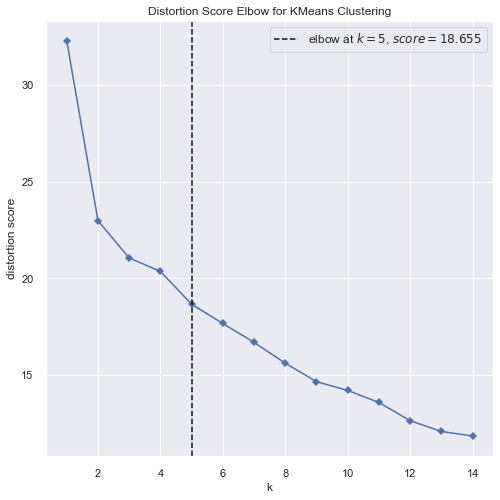

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [931]:
plt.figure(figsize=(8,8))
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,15), timings=False)
visualizer.fit(combined_cities_grouped_clust)        # Fit the data to the visualizer
visualizer.show()      

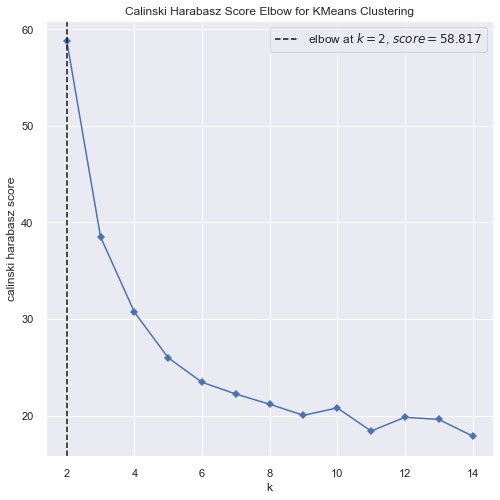

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [934]:
plt.figure(figsize=(8,8))

model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), timings=False,metric='calinski_harabasz')
visualizer.fit(combined_cities_grouped_clust)        # Fit the data to the visualizer
visualizer.show()  

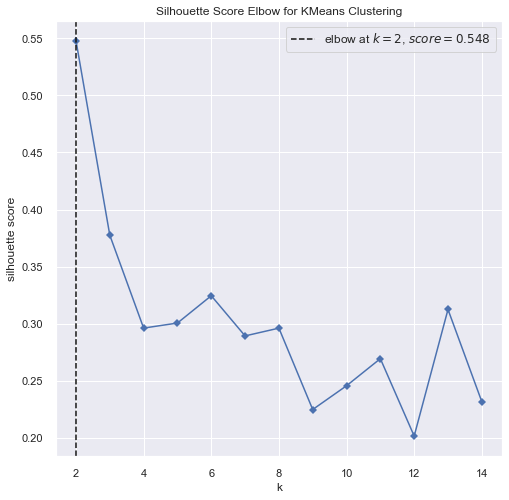

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [935]:
plt.figure(figsize=(8,8))

model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), timings=False,metric='silhouette')
visualizer.fit(combined_cities_grouped_clust)        # Fit the data to the visualizer
visualizer.show()  

In [936]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def return_inertia_sil(dataframe,n):
    variances=[]
    sil=[]
    k=[i for i in range(1,n+1)]
    for i in range(1,n+1):
        model=KMeans(n_clusters=i,random_state=0).fit(dataframe)
        variances.append(model.inertia_)
        if i > 1:
            labels=model.labels_
            sil.append(silhouette_score(dataframe,labels,metric='euclidean'))
    
    return variances,sil,k,n


        

<h3> Below are my own visualizations without using a library:</h3>

<p>You may be asking what is inertia or what is silhouette? The below will explain it for you</p>

<h2>Inertia</h2>
<blockquote cite=https://scikit-learn.org/stable/modules/clustering.html>
    The k-means algorithm divides a set of  samples  into  disjoint clusters , each described by the mean 
 of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from , although they live in the same space.The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion.Inertia can be recognized as a measure of how internally coherent clusters are.

</blockquote>

<h2>Silhouette</h2>

<blockquote>
The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

    Source: Wikipedia
 </blockquote>
 
<blockquote cite=https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb>
    The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.
</blockquote>

<p>The equations for both can be found online</p>

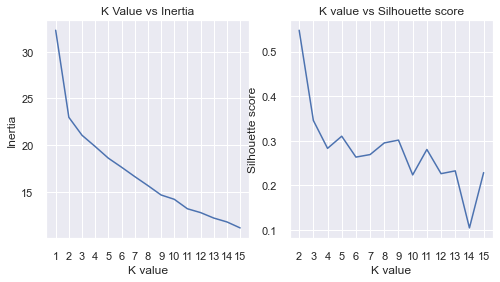

In [938]:
variances,sil,k,n=return_inertia_sil(combined_cities_grouped_clust,15)
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(k,variances)
plt.ylabel("Inertia")
plt.xlabel("K value")
plt.title("K Value vs Inertia")
plt.xticks([i for i in range (1,n+1)])


plt.subplot(1,2,2)
k=[i for i in range(2,n+1)]
plt.plot(k,sil)
plt.ylabel("Silhouette score")
plt.xlabel("K value")
plt.title("K value vs Silhouette score")
plt.xticks([i for i in range (2,n+1)])

plt.show()

<b>So what is the perfect K-value to use? well looking from our many metrics that we used I would say it would be around 2 as that is what most metrics say. I will also try 4 as that is what the distortion metrics said. I will use cluster from 2-3-4 and see if i can see how they are separated and choose the value i think is best from there. </b>

In [939]:
kmeans=KMeans(n_clusters=2,random_state=0).fit(combined_cities_grouped_clust)

kmeans.labels_



array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [940]:
def return_most_common_venues(row,num_top_venues):
    row_categories=row.iloc[1:]
    row_categories_sorted=row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]



In [941]:
num_top_venues=10

columns=["Neighborhoods"]

for ind in np.arange(num_top_venues):
    columns.append('#{} Most common Venue'.format(ind+1))

    
neighborhoods_venues_sorted=pd.DataFrame(columns=columns)
neighborhoods_venues_sorted["Neighborhoods"]=combined_cities_grouped["Neighborhoods"]

for ind in np.arange(combined_cities_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind,1:]=return_most_common_venues(combined_cities_grouped.iloc[ind,:],num_top_venues)

In [942]:
neighborhoods_venues_sorted.insert(0,column="Cluster label",value=kmeans.labels_)

In [943]:
neighborhoods_venues_sorted.head()

,Cluster label,Neighborhoods,#1 Most common Venue,#2 Most common Venue,#3 Most common Venue,#4 Most common Venue,#5 Most common Venue,#6 Most common Venue,#7 Most common Venue,#8 Most common Venue,#9 Most common Venue,#10 Most common Venue
0,1,Adams,Thai Restaurant,Gym,Mediterranean Restaurant,Medical Center,Park,Soccer Field,Light Rail Station,Zoo Exhibit,Fast Food Restaurant,Fabric Shop
1,0,Alamo Square,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
2,1,Alki Point,Beach,Lighthouse,Baseball Field,Baseball Stadium,Financial or Legal Service,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
3,0,Anza Vista,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
4,1,Arbor Heights,Music Venue,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service


In [944]:
both_cities=pd.concat([results_sf,results_seat])
both_cities

,City,Neighborhoods,Latitude,Longitude
0,San Francisco,Alamo Square,37.776360,-122.434700
1,San Francisco,Anza Vista,37.780836,-122.443149
2,San Francisco,Balboa Hollow,37.798794,-122.436098
3,San Francisco,Bayview,37.728889,-122.392500
4,San Francisco,Belden Place,37.791744,-122.403886
...,...,...,...,...
106,Seattle,Riverview,47.539383,-122.349189
107,Seattle,Highland Park,47.528432,-122.352626
108,Seattle,South Delridge,47.552123,-122.363874
109,Seattle,Roxhill,47.519866,-122.367813


In [945]:
both_cities=both_cities.join(neighborhoods_venues_sorted.set_index('Neighborhoods'),on="Neighborhoods")
both_cities.reset_index(inplace=True)

In [946]:
both_cities

,index,City,Neighborhoods,Latitude,Longitude,Cluster label,#1 Most common Venue,#2 Most common Venue,#3 Most common Venue,#4 Most common Venue,#5 Most common Venue,#6 Most common Venue,#7 Most common Venue,#8 Most common Venue,#9 Most common Venue,#10 Most common Venue
0,0,San Francisco,Alamo Square,37.776360,-122.434700,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
1,1,San Francisco,Anza Vista,37.780836,-122.443149,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
2,2,San Francisco,Balboa Hollow,37.798794,-122.436098,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
3,3,San Francisco,Bayview,37.728889,-122.392500,1,Beach,Park,Scenic Lookout,Zoo Exhibit,Field,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant
4,4,San Francisco,Belden Place,37.791744,-122.403886,1,Beach,Kebab Restaurant,Plaza,Playground,Trail,Dog Run,Field,Fabric Shop,Fair,Falafel Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,106,Seattle,Riverview,47.539383,-122.349189,1,Trail,Baseball Field,Park,Smoke Shop,Zoo Exhibit,Field,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant
144,107,Seattle,Highland Park,47.528432,-122.352626,1,Gym,Construction & Landscaping,Bar,Playground,Baseball Field,Food,Flower Shop,Food & Drink Shop,Food Court,Fish Market
145,108,Seattle,South Delridge,47.552123,-122.363874,1,Gas Station,Pet Service,Convenience Store,Playground,Pizza Place,Vietnamese Restaurant,Donut Shop,Trail,Zoo Exhibit,Fabric Shop
146,109,Seattle,Roxhill,47.519866,-122.367813,1,Coffee Shop,Cosmetics Shop,Bus Stop,Thai Restaurant,Gas Station,Supermarket,Big Box Store,Furniture / Home Store,Bowling Alley,Burrito Place


<h2>All cluster 0 locations for Both Seattle and San Francisco Neighborhoods</h2>

In [947]:
both_cities.loc[both_cities['Cluster label'] == 0, both_cities.columns[[0,1,2] + list(range(5, both_cities.shape[1]))]]


,index,City,Neighborhoods,Cluster label,#1 Most common Venue,#2 Most common Venue,#3 Most common Venue,#4 Most common Venue,#5 Most common Venue,#6 Most common Venue,#7 Most common Venue,#8 Most common Venue,#9 Most common Venue,#10 Most common Venue
0,0,San Francisco,Alamo Square,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
1,1,San Francisco,Anza Vista,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
2,2,San Francisco,Balboa Hollow,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
6,11,San Francisco,Civic Center,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
7,13,San Francisco,Cole Valley,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
8,15,San Francisco,Cow Hollow,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
11,23,San Francisco,Eureka Valley,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
19,38,San Francisco,Islais Creek,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
21,51,San Francisco,Lower Pacific Heights,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
25,70,San Francisco,Parkside,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service


<p> the 1st most common venue seems to be Boat or Ferry and cluster 0 is only in San Francisco.</p>

<h2> All cluster 1 locations for Both Seattle and San Francisco Neighborhoods</h2>

In [948]:
both_cities.loc[both_cities['Cluster label'] == 1, both_cities.columns[[0,1,2] + list(range(5, both_cities.shape[1]))]]


,index,City,Neighborhoods,Cluster label,#1 Most common Venue,#2 Most common Venue,#3 Most common Venue,#4 Most common Venue,#5 Most common Venue,#6 Most common Venue,#7 Most common Venue,#8 Most common Venue,#9 Most common Venue,#10 Most common Venue
3,3,San Francisco,Bayview,1,Beach,Park,Scenic Lookout,Zoo Exhibit,Field,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant
4,4,San Francisco,Belden Place,1,Beach,Kebab Restaurant,Plaza,Playground,Trail,Dog Run,Field,Fabric Shop,Fair,Falafel Restaurant
5,9,San Francisco,China Basin,1,Playground,Zoo Exhibit,Financial or Legal Service,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
9,19,San Francisco,Dogpatch,1,Bakery,Bar,Restaurant,French Restaurant,Burger Joint,Bus Stop,Korean Restaurant,Coffee Shop,Park,Performing Arts Venue
10,22,San Francisco,Embarcadero,1,Boat or Ferry,Park,Chiropractor,Brewery,Botanical Garden,Canal Lock,Diner,Tourist Information Center,Burger Joint,Harbor / Marina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,106,Seattle,Riverview,1,Trail,Baseball Field,Park,Smoke Shop,Zoo Exhibit,Field,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant
144,107,Seattle,Highland Park,1,Gym,Construction & Landscaping,Bar,Playground,Baseball Field,Food,Flower Shop,Food & Drink Shop,Food Court,Fish Market
145,108,Seattle,South Delridge,1,Gas Station,Pet Service,Convenience Store,Playground,Pizza Place,Vietnamese Restaurant,Donut Shop,Trail,Zoo Exhibit,Fabric Shop
146,109,Seattle,Roxhill,1,Coffee Shop,Cosmetics Shop,Bus Stop,Thai Restaurant,Gas Station,Supermarket,Big Box Store,Furniture / Home Store,Bowling Alley,Burrito Place


In [949]:
Map_clusters=folium.Map(location=[41.64366,-83.48688],zoom_start=3)


colors=["green","orange"]



for lat,lon,poi,cluster in zip(both_cities["Latitude"],both_cities["Longitude"],both_cities["Neighborhoods"],both_cities["Cluster label"]):
    label=folium.Popup(str(poi)+' Cluster '+str(cluster),parse_html=True)
    folium.Marker(
            [lat,lon],
            popup=label,
            icon=folium.Icon(color=colors[cluster-1])
        ).add_to(Map_clusters)
    
Map_clusters

<p> As you can see from the markers, the neighborhoods in seattle and San Francisco both fit into mostly 1 single cluster(cluster 1)</p>

<h4> Now we will look at the most common venues between the two clusters. It should be noted that there is a lot more cluster 0 than cluster 1 so counts will be different.</h4>

In [950]:
import seaborn as sns

In [953]:
both_cities=both_cities.drop(columns=["index"])

In [954]:
both_cities.head()

,City,Neighborhoods,Latitude,Longitude,Cluster label,#1 Most common Venue,#2 Most common Venue,#3 Most common Venue,#4 Most common Venue,#5 Most common Venue,#6 Most common Venue,#7 Most common Venue,#8 Most common Venue,#9 Most common Venue,#10 Most common Venue
0,San Francisco,Alamo Square,37.776360,-122.434700,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
1,San Francisco,Anza Vista,37.780836,-122.443149,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
2,San Francisco,Balboa Hollow,37.798794,-122.436098,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
3,San Francisco,Bayview,37.728889,-122.392500,1,Beach,Park,Scenic Lookout,Zoo Exhibit,Field,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant
4,San Francisco,Belden Place,37.791744,-122.403886,1,Beach,Kebab Restaurant,Plaza,Playground,Trail,Dog Run,Field,Fabric Shop,Fair,Falafel Restaurant


In [955]:
count_1st_ven = both_cities.drop(['City','Neighborhoods', 'Latitude', 'Longitude'], axis=1)
count_1st_ven

,Cluster label,#1 Most common Venue,#2 Most common Venue,#3 Most common Venue,#4 Most common Venue,#5 Most common Venue,#6 Most common Venue,#7 Most common Venue,#8 Most common Venue,#9 Most common Venue,#10 Most common Venue
0,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
1,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
2,0,Boat or Ferry,Zoo Exhibit,Fish & Chips Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service
3,1,Beach,Park,Scenic Lookout,Zoo Exhibit,Field,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant
4,1,Beach,Kebab Restaurant,Plaza,Playground,Trail,Dog Run,Field,Fabric Shop,Fair,Falafel Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
143,1,Trail,Baseball Field,Park,Smoke Shop,Zoo Exhibit,Field,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant
144,1,Gym,Construction & Landscaping,Bar,Playground,Baseball Field,Food,Flower Shop,Food & Drink Shop,Food Court,Fish Market
145,1,Gas Station,Pet Service,Convenience Store,Playground,Pizza Place,Vietnamese Restaurant,Donut Shop,Trail,Zoo Exhibit,Fabric Shop
146,1,Coffee Shop,Cosmetics Shop,Bus Stop,Thai Restaurant,Gas Station,Supermarket,Big Box Store,Furniture / Home Store,Bowling Alley,Burrito Place


In [956]:
count_1st_venue=count_1st_ven.groupby(['Cluster label','#1 Most common Venue']).size().reset_index(name="Count")

count_1st_venue



,Cluster label,#1 Most common Venue,Count
0,0,Boat or Ferry,10
1,1,African Restaurant,1
2,1,American Restaurant,1
3,1,Arts & Crafts Store,1
4,1,Asian Restaurant,2
...,...,...,...
56,1,Sushi Restaurant,1
57,1,Thai Restaurant,1
58,1,Theater,1
59,1,Trail,1


In [957]:
count_1st_venue=count_1st_venue.pivot(index='Cluster label', columns='#1 Most common Venue', values='Count')

count_1st_venue=count_1st_venue.fillna(0).astype(int).reset_index(drop=True)
count_1st_venue

#1 Most common Venue,African Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Beach,Boat or Ferry,Breakfast Spot,Brewery,Bus Stop,Business Service,Café,Candy Store,Chinese Restaurant,Coffee Shop,Deli / Bodega,Dog Run,Ethiopian Restaurant,Exhibit,Food Truck,Furniture / Home Store,Gas Station,Greek Restaurant,Grocery Store,Gym,Ice Cream Shop,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Lake,Laundry Service,Light Rail Station,Lighthouse,Marijuana Dispensary,Martial Arts School,Mexican Restaurant,Middle Eastern Restaurant,Music Venue,Organic Grocery,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Sandwich Place,Scenic Lookout,Seafood Restaurant,Soccer Field,Southern / Soul Food Restaurant,Sushi Restaurant,Thai Restaurant,Theater,Trail,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,2,1,2,5,2,6,5,1,1,3,1,4,1,3,25,2,1,1,1,1,1,3,1,1,1,5,2,1,1,1,1,1,2,1,2,2,1,1,2,1,15,1,1,1,2,1,1,1,1,3,2,1,1,1,1,1,2


Text(0, 0.5, 'Clusters')

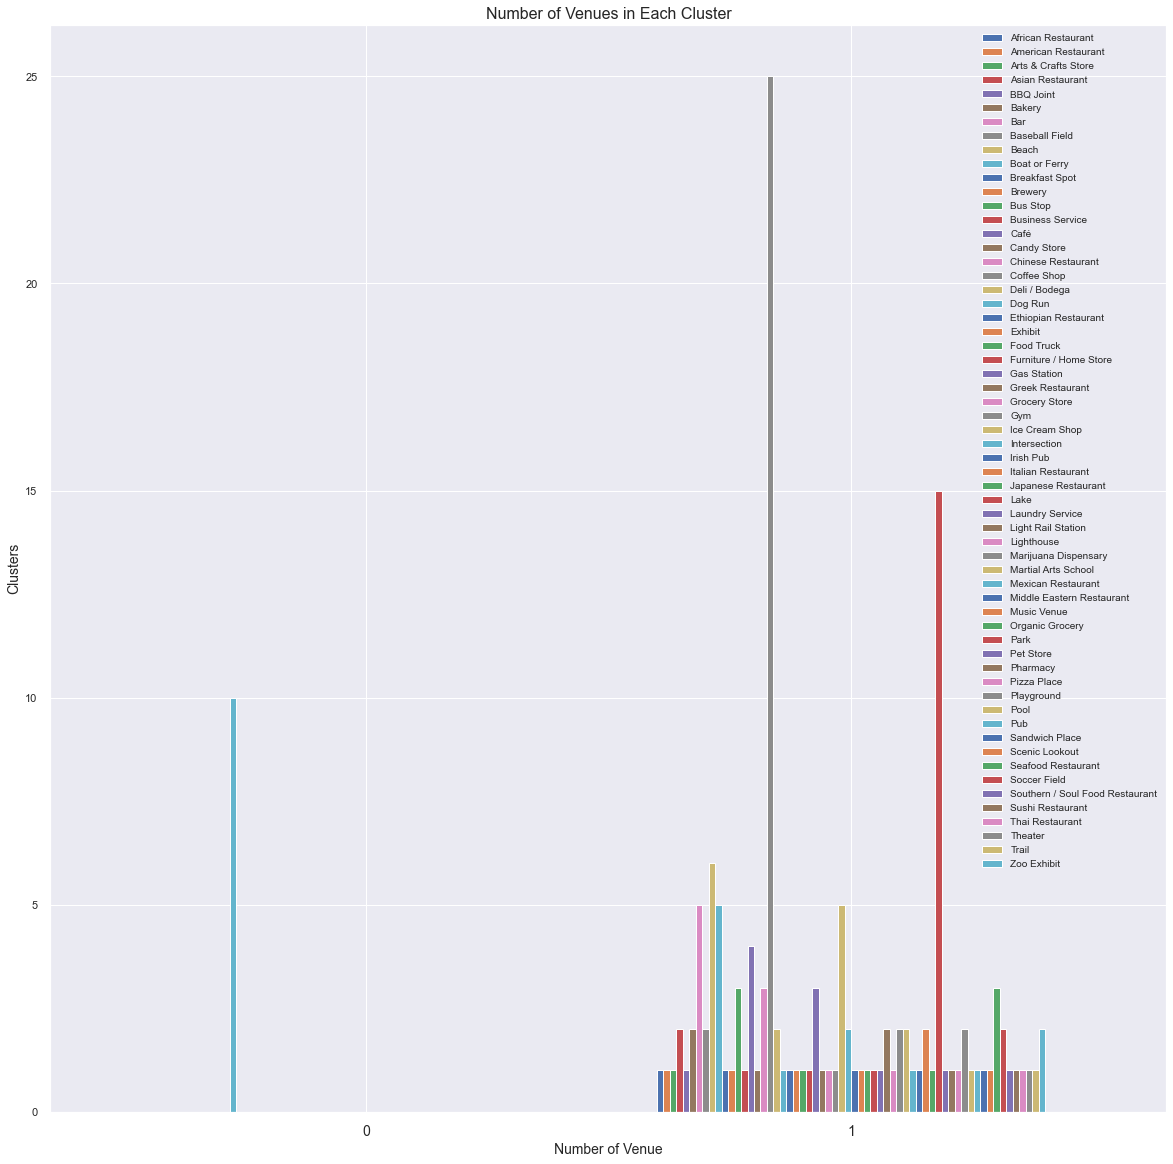

In [958]:
ax1=count_1st_venue.plot(kind='bar',figsize=(20,20),width = 0.8)

plt.legend(labels=count_1st_venue.columns,fontsize= 10)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

<h1> Discussion</h1>
<p> as stated before Cluster 0 is mostly ferry or boat venues and cluster 1 is an assortment of all sorts of different venues.</p>

<p>Cluster 1 is in both cities while cluster 0 is only in San Francisco.I think the reason for cluser 1 being predominant in both cities is because both seattle and San Francisco are cities of major importance. They would fall into metropolitan cities like that of New York and it would make sense for both of the cities to share many similairites in terms of venues, the similarities between attractions, restaurants, etc.  Cluster 0 for the most part contains a Boat or Ferry in either the 1st most common venue or 2nd most common venue. It also has things dealing with Fish like restaurants serving fish or fish markets. I think this is what separated cluster 1 from cluster 0. It makes sense for San Francisco to have cluster 0 because it is much closer to the pacific ocean than Seattle is and has islands as part of San Francisco.</p>

<h1> Conclusions</h1>
<p><b> So what type of store or restaurant is good to open up in what city? </b></p>
<p> I would say for the cluster 0 neighborhoods in San Francisco avoid restaurants that serve mainly fish food and maybe try opening cuisines from other countries like middle eastern cuisine or a chinese food restaurant. For the the neighborhoods in cluster 1. The type of restuarant to open would be pretty hard to determine since both seattle and San Francisco are both big cities so they are bound to have all different types of restaurants and cuisine already set up there.</p>

<h3>What city is a better option to live in? </h3>


<p> THe median housing prices for both cities are also pretty expensive. According to RedFin the median sale price of of a house in Seattle is $750,000 while in San Francisco is 1.4 million dollars[4,5]. Boths seem pretty hefty though Seattle is a bit cheaper. Thefore, it is recommended to rent an apartment if money is an issue.</p>

<h1> References </h1>
<ol>
<li> <a href=https://en.wikipedia.org/wiki/List_of_neighborhoods_in_San_Francisco>San Francisco Venues</a></li>
<li><a href=https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle>Seattle Venues</a></li>
<li><a href=https://developer.foursquare.com/> Foursquare API</a></li>
<li><a href=https://www.redfin.com/city/16163/WA/Seattle/housing-market>Seattle Median Housing Prices</a></li>
<li><a href=https://www.redfin.com/city/17151/CA/San-Francisco/housing-market>San Francisco Median Housing Prices</a></li>
</ol>
